In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df1=pd.read_csv('UserDetails.csv.csv')
df2=pd.read_csv('CookingSessions.csv.csv')
df3=pd.read_csv('OrderDetails.csv.csv')

In [4]:
#cleaned

In [5]:
df1.columns

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')

In [6]:
df2.columns

Index(['Session ID', 'User ID', 'Dish Name', 'Meal Type', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating'],
      dtype='object')

In [7]:
df3.columns

Index(['Order ID', 'User ID', 'Order Date', 'Meal Type', 'Dish Name',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID'],
      dtype='object')

In [8]:
#merged 

In [9]:
merged_data = pd.merge(df1, df2, how='inner')  # Merge on UserID
merged_data = pd.merge(merged_data, df3,  how='inner')

In [10]:
merged_data.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,...,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,2024-12-01 19:00,2024-12-01 19:30,30,4.5,1001,2024-12-01,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,2024-12-02 07:30,2024-12-02 08:00,30,4.2,1004,2024-12-02,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,2024-12-05 19:00,2024-12-05 19:40,40,4.9,1009,2024-12-05,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,2024-12-01 12:00,2024-12-01 12:20,20,4.0,1002,2024-12-01,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,...,2024-12-03 18:30,2024-12-03 19:00,30,4.3,1006,2024-12-03,Completed,14.0,Night,4.0


In [11]:
merged_data.dtypes

User ID               object
User Name             object
Age                    int64
Location              object
Registration Date     object
Phone                 object
Email                 object
Favorite Meal         object
Total Orders           int64
Session ID            object
Dish Name             object
Meal Type             object
Session Start         object
Session End           object
Duration (mins)        int64
Session Rating       float64
Order ID               int64
Order Date            object
Order Status          object
Amount (USD)         float64
Time of Day           object
Rating               float64
dtype: object

In [12]:
# To get unique values in a specific column of merged_data
unique_values = merged_data['Dish Name'].unique()

# Display the unique values
print(unique_values)


['Spaghetti' 'Pancakes' 'Grilled Chicken' 'Caesar Salad' 'Oatmeal'
 'Veggie Burger']


In [13]:
unique_values = merged_data['Order Status'].unique()
unique_values

array(['Completed', 'Canceled'], dtype=object)

In [14]:
# analysing the relationship btw cooking session and user order

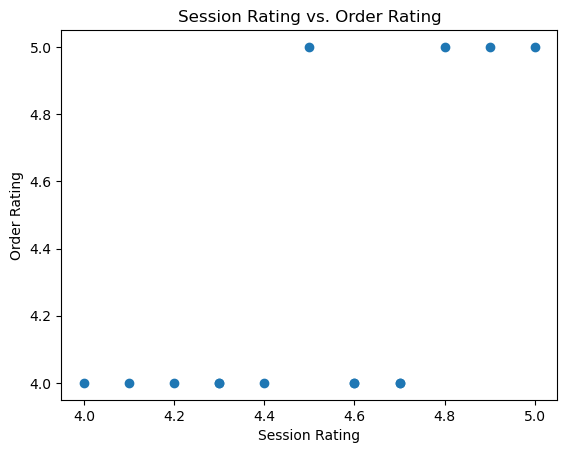

In [16]:
plt.scatter(merged_data['Session Rating'], merged_data['Rating'])
plt.xlabel('Session Rating')
plt.ylabel('Order Rating')
plt.title('Session Rating vs. Order Rating')
plt.show()

In [17]:
correlation = merged_data[['Session Rating', 'Rating']].corr()
print(correlation)


                Session Rating    Rating
Session Rating        1.000000  0.635487
Rating                0.635487  1.000000


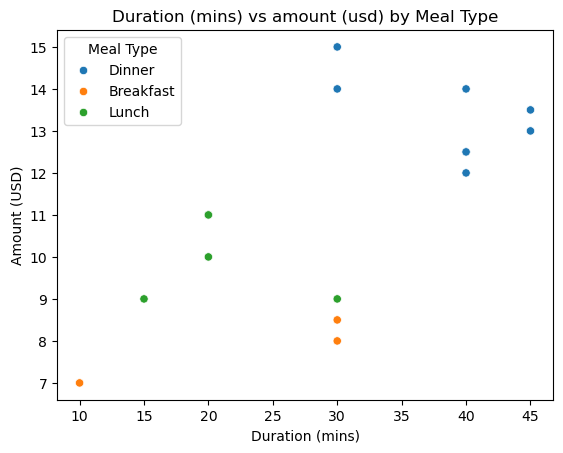

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with hue based on 'Meal Type'
sns.scatterplot(data=merged_data, x='Duration (mins)', y='Amount (USD)', hue='Meal Type')

plt.xlabel('Duration (mins)')
plt.ylabel('Amount (USD)')
plt.title('Duration (mins) vs amount (usd) by Meal Type')
plt.legend(title='Meal Type')
plt.show()


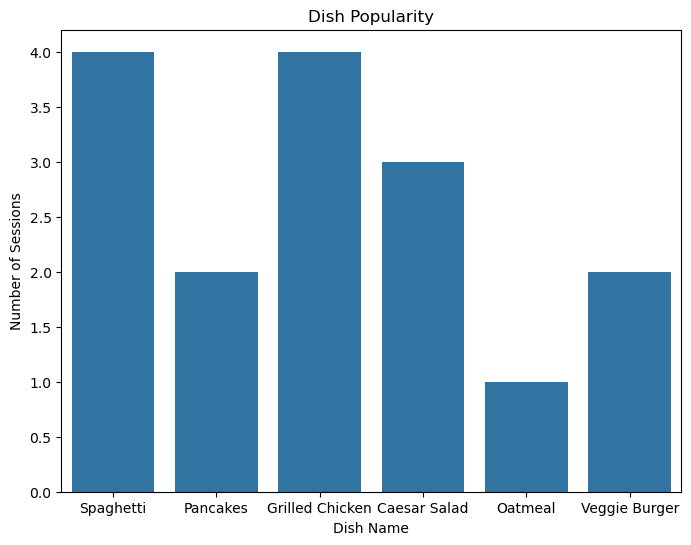

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dish Name', data=merged_data)
plt.title('Dish Popularity')
plt.xlabel('Dish Name')
plt.ylabel('Number of Sessions')
plt.show()

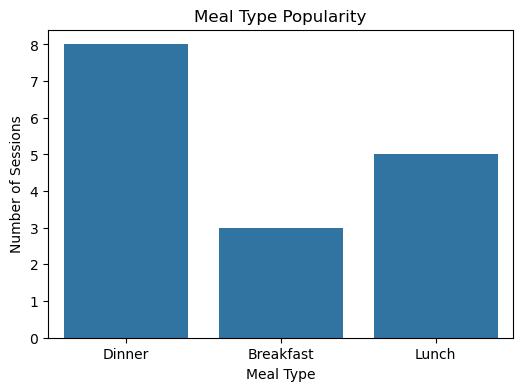

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Meal Type', data=merged_data)
plt.title('Meal Type Popularity')
plt.xlabel('Meal Type')
plt.ylabel('Number of Sessions')
plt.show()

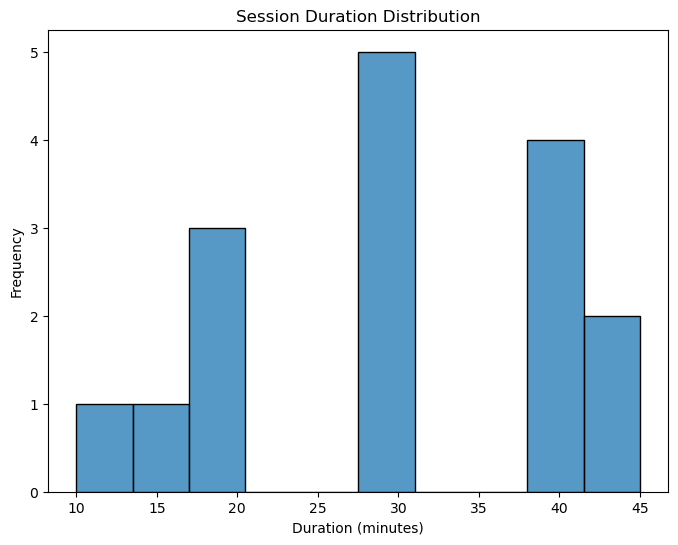

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['Duration (mins)'], bins=10)
plt.title('Session Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

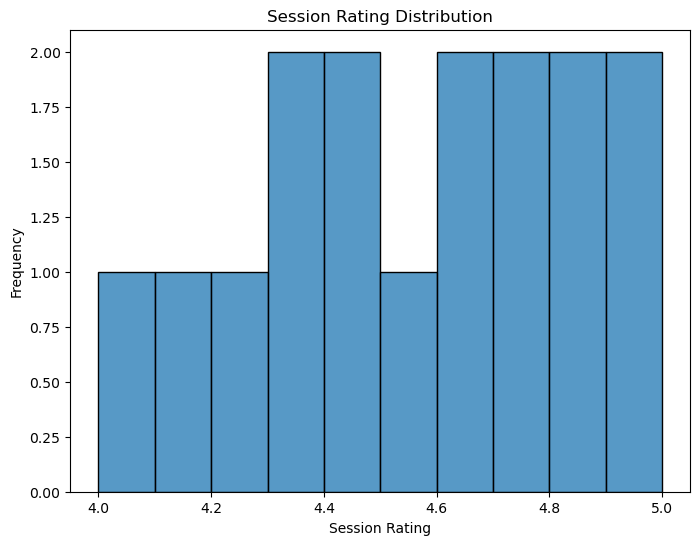

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['Session Rating'], bins=10)
plt.title('Session Rating Distribution')
plt.xlabel('Session Rating')
plt.ylabel('Frequency')
plt.show()

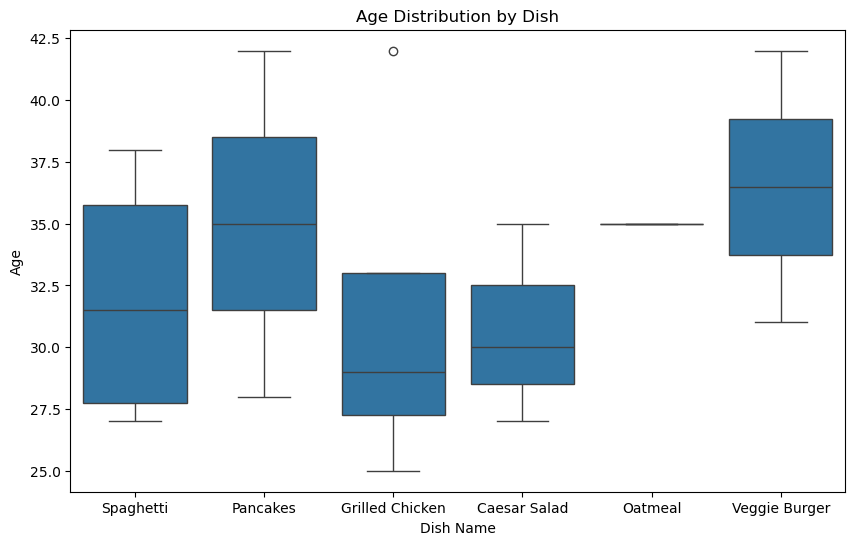

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dish Name', y='Age', data=merged_data)
plt.title('Age Distribution by Dish')
plt.xlabel('Dish Name')
plt.ylabel('Age')
plt.show()

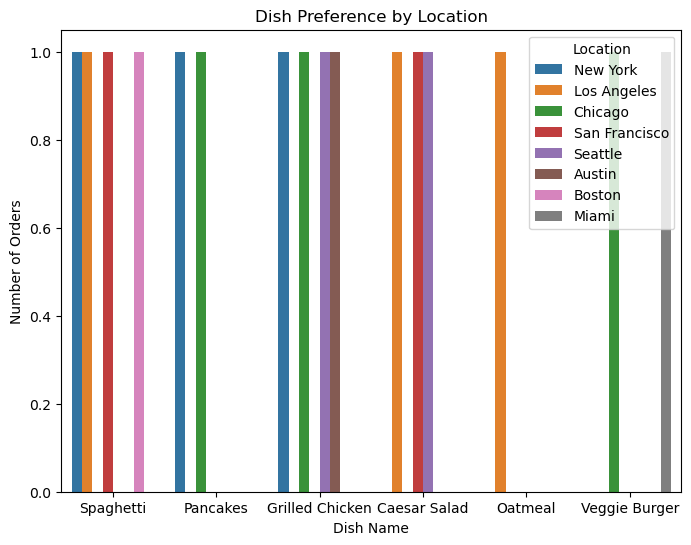

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Dish Name', hue='Location', data=merged_data)
plt.title('Dish Preference by Location')
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.show()

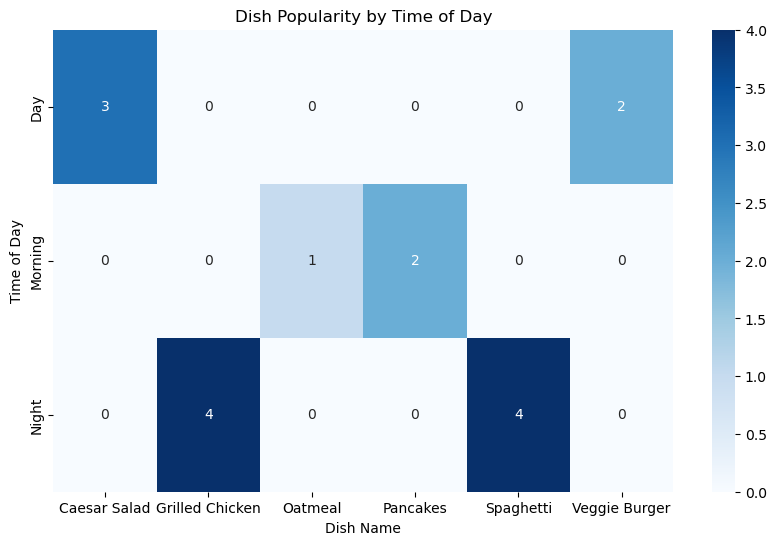

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(merged_data['Time of Day'], merged_data['Dish Name']), annot=True, cmap='Blues')
plt.title('Dish Popularity by Time of Day')
plt.xlabel('Dish Name')
plt.ylabel('Time of Day')
plt.show()